### Data Preparation

In [1]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm #for regression analysis
import plotly.express as px

In [2]:
# read dataset 
df = pd.read_csv(r'C:\Users\Admin\data-analysis\sales-and-marketing-budget\market_data.csv')
df.head().T

,0,1,2,3,4
Sale,240368.00,207276.00,172572.00,82697.00,141762.00
InStrSpending,59.90,7.28,9.81,46.94,2.59
Discount,0.46,0.39,0.41,0.27,0.26
TVSpending,46.30,166.91,73.67,33.95,82.63
StockRate,0.45,0.05,0.06,0.88,0.36
Price,12.56,5.44,3.54,28.90,4.66
Radio,1065.00,1832.00,587.00,1407.00,2057.00
OnlineAdsSpending,1081.60,651.24,1066.56,1855.27,1608.91


In [3]:
# print metadata
met_df= pd.read_csv(r'C:\Users\Admin\data-analysis\sales-and-marketing-budget\metadata.csv')
print(met_df)

                 Attribute                                              Value
0                Data type                                   Numbers(integer)
1              Data format                                               CSV 
2              Data source  https://www.kaggle.com/datasets/ai0909/sales-d...
3  Date and time collected                            2023-10-17 12:00:00 CET
4  Description of the data  This dataset contains information about Sale[s...
5      Purpose of the data  This data will be used to analyze the relation...


In [4]:
df.shape

(992, 8)

In [5]:
# check for missing values
df.isnull().sum()

Sale                 0
InStrSpending        0
Discount             0
TVSpending           0
StockRate            0
Price                0
Radio                0
OnlineAdsSpending    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sale               992 non-null    int64  
 1   InStrSpending      992 non-null    float64
 2   Discount           992 non-null    float64
 3   TVSpending         992 non-null    float64
 4   StockRate          992 non-null    float64
 5   Price              992 non-null    float64
 6   Radio              992 non-null    int64  
 7   OnlineAdsSpending  992 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 62.1 KB


In [7]:
# Examine and handling outliers if any
# Calculate the IQR (Interquartile Range)
Q1 = df.Sale.quantile(0.25)
Q3 = df.Sale.quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
outliers = df[(df.Sale < lower_bound) | (df.Sale > upper_bound)]
outliers

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending


###### There are no outliers base on the result 

### Descriptive analysis

In [8]:
# calculate the summary statistics 
df.describe()

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,171327.118952,30.593034,0.251139,98.678740,0.494526,14.599829,1479.569556,1596.504284
std,81397.843301,17.493103,0.145348,57.117347,0.286810,8.715533,885.419636,927.474787
min,1992.000000,0.190000,0.000000,0.130000,0.000000,0.140000,4.000000,12.540000
25%,112479.250000,14.830000,0.130000,49.637500,0.250000,6.917500,708.250000,786.327500
50%,170390.500000,31.385000,0.250000,97.510000,0.490000,14.820000,1413.500000,1595.455000
75%,226027.250000,45.660000,0.380000,147.620000,0.740000,22.100000,2273.000000,2420.687500
max,393914.000000,59.960000,0.500000,199.910000,1.000000,29.990000,2997.000000,3198.270000


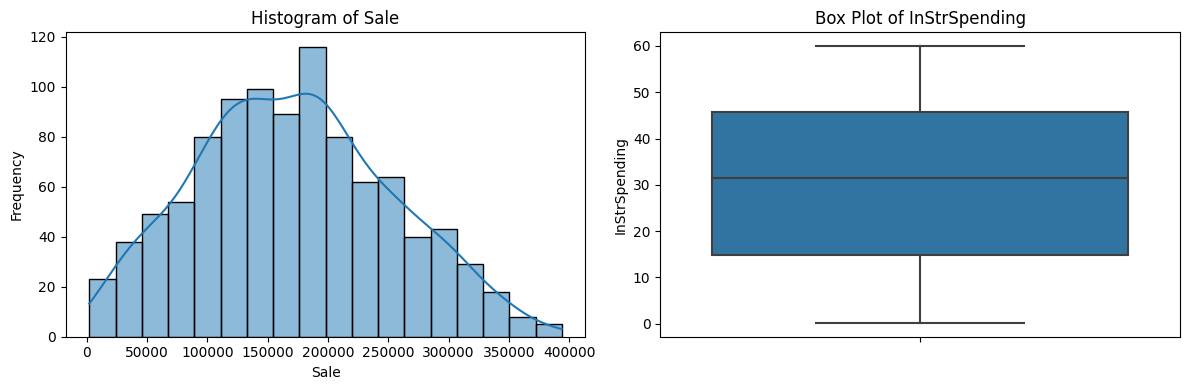

In [9]:
# Visual to understand the distribution of the dataset
# Set up the figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Create a histogram
sns.histplot(df.Sale, kde=True, ax=ax1)
ax1.set_title(f'Histogram of Sale')
ax1.set_xlabel('Sale')
ax1.set_ylabel('Frequency')

# Create a box plot
sns.boxplot(y=df.InStrSpending, ax=ax2)
ax2.set_title(f'Box Plot of InStrSpending')
ax2.set_ylabel('InStrSpending')

# Show the visualizations
plt.tight_layout()
plt.show()

In [10]:
# Calculate the mean (average)
mean = np.mean(df.Sale)

# Calculate the standard deviation
std_dev = np.std(df.Sale)

# Calculate the variance
variance = np.var(df.Sale)

# Calculate the range
data_range = np.max(df.Sale) - np.min(df.Sale)

# Print the results
print("Mean (Average):", mean)
print("Standard Deviation:", std_dev)
print("Variance:", variance)
print("Range:", data_range)

Mean (Average): 171327.1189516129
Standard Deviation: 81356.80581712935
Variance: 6618929852.766091
Range: 391922


## Data Exploration

In [11]:
df.head()

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
0,240368,59.90,0.46,46.30,0.45,12.56,1065,1081.60
1,207276,7.28,0.39,166.91,0.05,5.44,1832,651.24
2,172572,9.81,0.41,73.67,0.06,3.54,587,1066.56
3,82697,46.94,0.27,33.95,0.88,28.90,1407,1855.27
4,141762,2.59,0.26,82.63,0.36,4.66,2057,1608.91


In [12]:
df.columns

Index(['Sale', 'InStrSpending', 'Discount', 'TVSpending', 'StockRate', 'Price',
       'Radio', 'OnlineAdsSpending'],
      dtype='object')

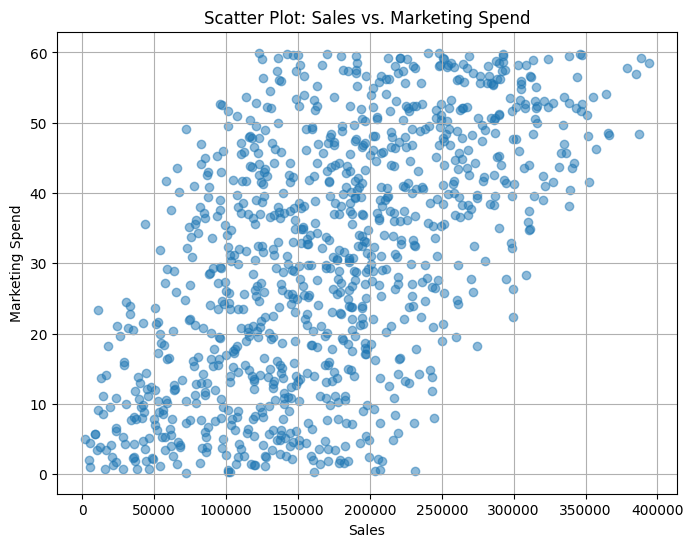

In [13]:
# check the relationship between the sales and marketing spend
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df.Sale, df.InStrSpending, alpha=0.5)
plt.title('Scatter Plot: Sales vs. Marketing Spend')
plt.ylabel('Marketing Spend')
plt.xlabel('Sales')
plt.grid(True)

In [14]:
# Calculate the correlation coefficient between sales and marketing spend
correlation = np.corrcoef(df['InStrSpending'], df["Sale"])[0, 1]

# Print the correlation coefficient
print('Correlation coefficient:', correlation)

Correlation coefficient: 0.5777080019585074


In [15]:
# Select the columns for sales and marketing spend
X = df['InStrSpending'] 
y = df['Sale']  

# Add a constant to the independent variable (marketing spend)
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Get the R-squared value
r_squared = model.rsquared

# Print the R-squared value
print("R-squared (Coefficient of Determination):", r_squared)

R-squared (Coefficient of Determination): 0.3337465355268907


###### - correlation coefficient of 0.5777080019585074 indicates a moderate positive correlation between sales and marketing spend. This means that as marketing spend increases, sales also tends to increase, but the relationship is not perfect.

###### -  An R-squared value of 0.3337 indicates that approximately 33.37% of the variation in sales can be explained by the variation in marketing spend. In other words, marketing spend has some influence on sales, but it doesn't explain the entire variation.

In [16]:
# check the relationship between the sales and discount
# Create a scatter plot
# plt.figure(figsize=(8, 6))
# plt.scatter(df.Sale, df.Radio, alpha=0.5)
# plt.title('Scatter Plot: Sales vs. Discount')
# plt.xlabel('Discount')
# plt.ylabel('Sales')
# plt.grid(True)

In [17]:
total = df.sum()
total=pd.DataFrame({'Total_Sum': total.map('{:.2f}'.format)}).T
                    # use map to format standard decimal notation (2f indicate 2 decimal places)
total

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
Total_Sum,169956502.00,30348.29,249.13,97889.31,490.57,14483.03,1467733.00,1583732.25


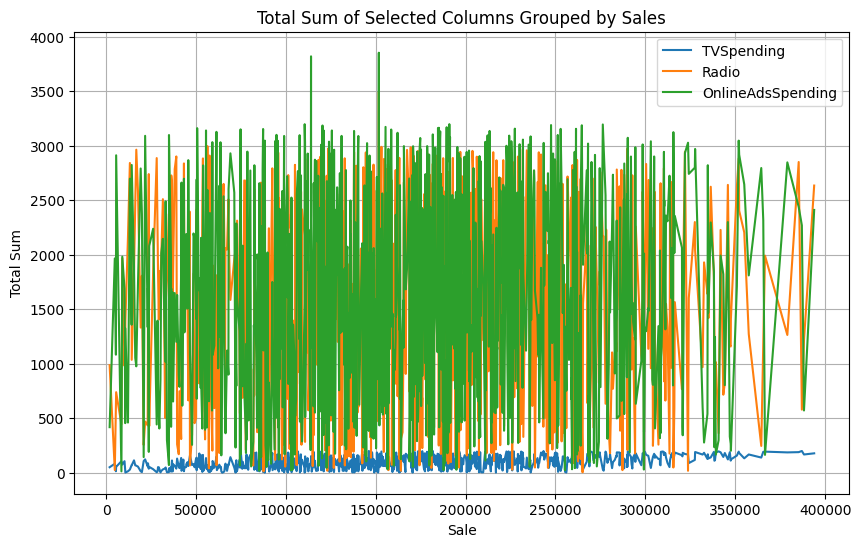

In [18]:
# Get the sales by Market campaign
# Group the data by the "Discount" header and calculate the sum of other columns
total_sum_by_sales = df.groupby('Sale')[['TVSpending', 'Radio', 'OnlineAdsSpending']].sum()

# Reset the index to make "Sales" a column
total_sum_by_sales.reset_index(inplace=True)

# Create a single line chart
plt.figure(figsize=(10, 6))

# Loop through each column to plot a line for each
columns_all = ['TVSpending', 'Radio', 'OnlineAdsSpending']
for column in columns_all:
    plt.plot(total_sum_by_sales['Sale'], total_sum_by_sales[column], label=column)

plt.xlabel('Sale')
plt.ylabel('Total Sum')
plt.title('Total Sum of Selected Columns Grouped by Sales')
plt.legend()
plt.grid(True)

# Show the line chart
plt.show()

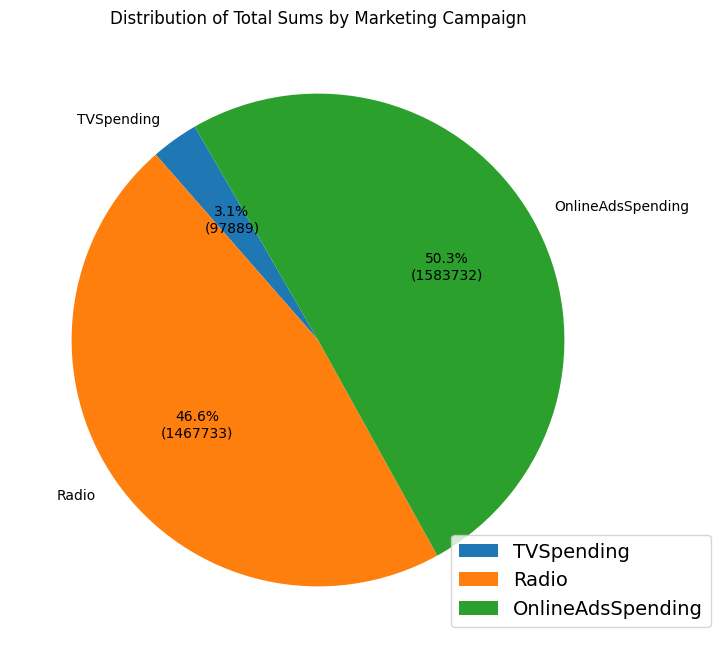

In [19]:
#Use pie chart to effective visualize the above result 
# Calculate the total sum for each column
total_sums = total_sum_by_sales[columns_all].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_sums, labels=columns_all, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(total_sums) / 100), startangle=120)
plt.title('Distribution of Total Sums by Marketing Campaign')
# Add a legend to the chart
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 0.2), fontsize=14)
# Show the pie chart
plt.show()

### Regression Analysis

In [20]:
#correlation between 'TVSpending', 'Radio', 'OnlineAdsSpending' by sales 
values = df[['Sale','TVSpending', 'Radio', 'OnlineAdsSpending']]
values.corr()

,Sale,TVSpending,Radio,OnlineAdsSpending
Sale,1.000000,0.413330,-0.015362,0.042385
TVSpending,0.413330,1.000000,-0.000920,0.012382
Radio,-0.015362,-0.000920,1.000000,0.045425
OnlineAdsSpending,0.042385,0.012382,0.045425,1.000000


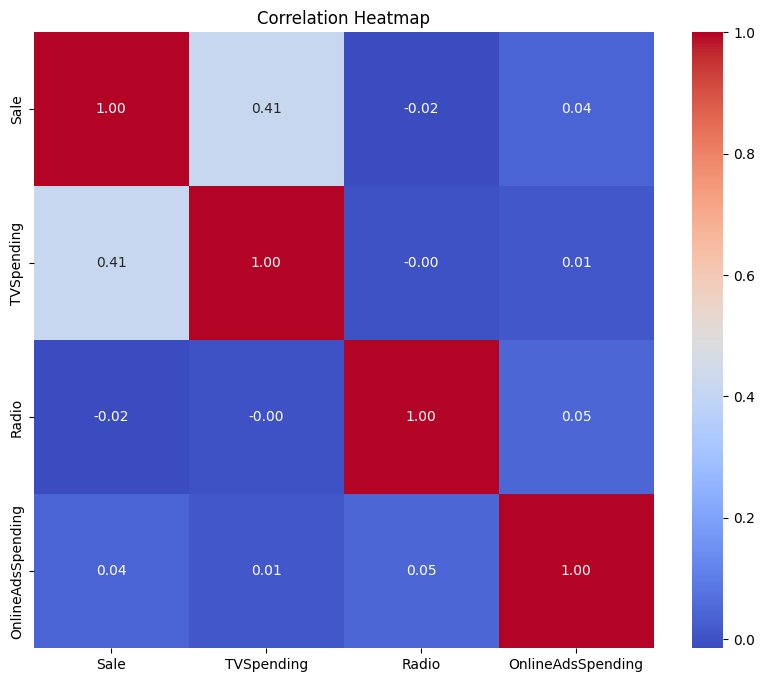

In [21]:
#visualise the correlation
# Calculate the correlation matrix
correlation_matrix = values.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap')
plt.show()

###### TV Spending is moderately positive correlated to Sales than Radio and OnlineAdsSpending

In [22]:
#calculate the correlation coefficients, intercept, and slope for each marketing campaign
 # Function to fit a simple linear regression model and return the results
def linear_regression_summary(x, y):
    '''get the correlation, intercept, slope'''
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    return model.params['const'], model.params[x.columns[1]], model.rsquared

# Calculate the correlation coefficients, intercept, and slope for TV spending, radio, and online ads spending
tv_intercept, tv_slope, tv_coeff = linear_regression_summary(df.TVSpending, df.Sale)
radio_intercept, radio_slope, radio_coeff = linear_regression_summary(df.Radio, df.Sale)
online_ads_intercept, online_ads_slope, online_ads_coeff= linear_regression_summary(df.OnlineAdsSpending, df.Sale)

# Print the results
print("TV Spending - Correlation Coefficient:", tv_coeff**0.5)
print("TV Spending - Intercept:", tv_intercept)
print("TV Spending - Slope:", tv_slope)
print("Radio - Correlation Coefficient:", radio_coeff**0.5)
print("Radio - Intercept:", radio_intercept)
print("Radio - Slope:", radio_slope)
print("Online Ads Spending - Correlation Coefficient:", online_ads_coeff**0.5)
print("Online Ads Spending - Intercept:", online_ads_intercept)
print("Online Ads Spending - Slope:", online_ads_slope)

TV Spending - Correlation Coefficient: 0.4133303124172377
TV Spending - Intercept: 113201.7504861283
TV Spending - Slope: 589.036387300725
Radio - Correlation Coefficient: 0.01536192382691817
Radio - Intercept: 173416.6303411749
Radio - Slope: -1.4122427569901246
Online Ads Spending - Correlation Coefficient: 0.04238509627529207
Online Ads Spending - Intercept: 165388.38256533036
Online Ads Spending - Slope: 3.7198374252922624


In [23]:
# ### Interpreting the best result which is TV Spending 
#     The correlation coefficient for TV spending is 0.4133303124172377, which indicates a moderate positive correlation between TV spending and sales. This means that as TV spending increases, sales also tend to increase, but the relationship is not perfect.

#     TV Spending - Intercept: 113201.7504861283 (this can only be interpreted if the relationship btw the variables is linear)

#     The slope for TV spending is 589.036387300725, which indicates that for every $1 increase in TV spending, sales are expected to increase by an average of $589.04.

In [24]:
def linear_regression_summary(x, y):
    '''get the r-squared'''
    # Add a constant to the independent variable (marketing spend)
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    return model.rsquared

tv_r_squared = linear_regression_summary(df.TVSpending, df.Sale)
radio_r_squared = linear_regression_summary(df.Radio, df.Sale)
online_ads_r_squared= linear_regression_summary(df.OnlineAdsSpending, df.Sale)


# Print the results
print("TV Spending - r_squared:", tv_r_squared)
# print("Radio - r_squared:", radio_r_squared)
# print("Online Ads Spending - r_squared:", online_ads_r_squared)

TV Spending - r_squared: 0.17084194716293133


### Hypothesis Testing

In [25]:
# Hypothesis: Does the level of TV spending significantly impact sales in the market?
# Research Question: Is there a statistically significant relationship between TV spending and sales in the market?
# Add a constant to the TV spending variable
tv_spending = sm.add_constant(df.TVSpending)

# Fit a linear regression model
model = sm.OLS(df.Sale, tv_spending).fit()

# Get the coefficient and standard error for TV spending
tv_coefficient = model.params['TVSpending']
tv_se = model.bse['TVSpending']

# Perform a t-test on the coefficient
t_statistic = tv_coefficient / tv_se
p_value = model.pvalues['TVSpending']

# Print the t-statistic and p-value
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 14.282235573483815
P-value: 3.2440755078733505e-42


In [29]:
#regression analysis
tv_spending = sm.add_constant(df.TVSpending)
model = sm.OLS(df.Sale, tv_spending).fit()
tv_coefficient = model.params['TVSpending']
tv_se = model.bse['TVSpending']
t_statistic = tv_coefficient / tv_se
p_value = model.pvalues['TVSpending']
r_squared = model.rsquared

In [30]:
# Create a DataFrame with the statistics
data = pd.DataFrame({
    'Statistic': ['Coefficient', 'Standard Error', 'T-statistic', 'P-value', 'R-squared'],
    'Value': [tv_coefficient, tv_se, t_statistic, p_value, r_squared],
})

# Format the values to two decimal places
data['Value'] = data['Value'].apply(lambda x: f'{x:.5g}')

# Display the table
data

,Statistic,Value
0,Coefficient,589.04
1,Standard Error,41.243
2,T-statistic,14.282
3,P-value,3.2441e-42
4,R-squared,0.17084


In [31]:
# ### Reporting
# The t-statistic of 14.282235573483815 indicates that there is a statistically significant relationship between TV spending and sales. The p-value of 3.2440755078733505e-42 is less than 0.05, which is the commonly used threshold for statistical significance.

# The R-squared value of 0.17 indicates that the linear regression model explains 17% of the variation in sales. This is a highest R-squared value compare to other market campaign, which suggests that TV spending is a strong predictor of sales.

# Recommendation:

# In light of the findings from this analysis, I suggest allocating a higher budget to television advertising expenditures. TV advertising demonstrates a correlation with sales and exhibits statistical significance.